In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def LJ(r):
    sig = 2**(-1/6)
    return 4*((sig/r)**12 - (sig/r)**6)

def Epot(param):
    pot = 0.
    for i in range(0,len(param)-1, 3):
        for j in range(i+3,len(param), 3):
            r = np.sqrt((param[i]-param[j])**2+(param[i+1]-param[j+1])**2+(param[i+2]-param[j+2])**2)
            pot += LJ(r)
    return pot

def Epot2D(param):
    pot = 0.
    for i in range(0,len(param)-1, 2):
        for j in range(i+2,len(param), 2):
            r = np.sqrt((param[i]-param[j])**2+(param[i+1]-param[j+1])**2)
            pot += LJ(r)
    return pot

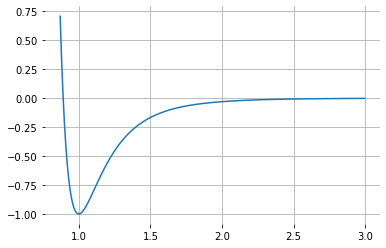

In [2]:
### plot potential function ###
x = np.arange(0.87, 3, 0.005)

plt.plot(x, LJ(x))

plt.grid()
plt.box(False)
plt.show()
#--> local minimum at r=1

In [3]:
### input variables ###
dims = 2 #2D or 3D
M = 20 #number of atoms
L = M/0.8 #length of box
SIG = 1 #standard deviation

In [4]:
### create random coordinates ###
### uncomment for integers as starting conditions ###
#rng = np.random.default_rng(seed=42) #create RNG with seed
#coords = rng.integers(low=0, high=L, size=(M,dims)) #get random coordinates within the domain (integers)

### uncomment for floats as starting conditions ###
np.random.seed(42) #create RNG with seed
coords = L*np.random.rand(M,dims) #get random coordinates within the domain (floats)
    
print("coords: \n", coords)
if dims == 3:
    print("potential random state: ", Epot(np.ndarray.flatten(coords)), "\n")
    result = optimize.minimize(Epot, coords, method="CG")
elif dims == 2:
    print("potential random state: ", Epot2D(np.ndarray.flatten(coords)), "\n")
    result = optimize.minimize(Epot2D, coords, method="CG")
else:
    print("RECOMMEND OTHER DIMENSIONAL INPUT")
    
### find minimum potential ###
print("potential minimum: ", result.fun)
print("new positions: ", result.x, "\n")

coords: 
 [[ 9.36350297 23.76785766]
 [18.29984855 14.9664621 ]
 [ 3.90046601  3.89986301]
 [ 1.4520903  21.65440364]
 [15.02787529 17.70181444]
 [ 0.51461236 24.2477463 ]
 [20.81106602  5.30847777]
 [ 4.54562418  4.58511275]
 [ 7.60605607 13.11891079]
 [10.79862547  7.2807285 ]
 [15.29632237  3.48734652]
 [ 7.30361621  9.15904608]
 [11.40174961 19.62939903]
 [ 4.99184455 12.85586096]
 [14.81036422  1.16126032]
 [15.1886213   4.26310309]
 [ 1.62628982 23.72213843]
 [24.14080083 20.2099337 ]
 [ 7.61534423  2.44180285]
 [17.10582566 11.00381234]]
potential random state:  8.752188707244597 

potential minimum:  -19.101966278919463
new positions:  [11.024959   21.25136695 16.5637314  14.3024851   5.86663738  6.04481504
  1.19754777 22.61207362 12.73087879 19.19246026  0.83476329 23.54378614
 16.90381166  4.34985583  6.56890956  6.75696913  7.45294321  9.41047725
  6.95608903  7.67626291 16.54398724  3.41512283  7.70054683  8.40327238
 13.35635559 18.41217619  6.70785542  8.68372457 15.5515

In [5]:
### create random velocities ###
SIG_mat = SIG * np.eye(dims)
mean = np.zeros(dims)
vels = np.random.multivariate_normal(mean, SIG_mat, size=M)
print("velocities: \n", vels)

### calculate mean velocity ###
mean_vels=np.mean(vels, axis=0)
print("mean velocity: ", mean_vels)

### update velocities ###
vels = vels - mean_vels
print("corrected velocities: \n", vels)

velocities: 
 [[-0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012]
 [-1.32818605  0.19686124]
 [ 0.73846658  0.17136828]
 [-0.11564828 -0.3011037 ]
 [-1.47852199 -0.71984421]
 [-0.46063877  1.05712223]
 [ 0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228]
 [-0.676922    0.61167629]
 [ 1.03099952  0.93128012]
 [-0.83921752 -0.30921238]
 [ 0.33126343  0.97554513]
 [-0.47917424 -0.18565898]
 [-1.10633497 -1.19620662]
 [ 0.81252582  1.35624003]
 [-0.07201012  1.0035329 ]
 [ 0.36163603 -0.64511975]
 [ 0.36139561  1.53803657]]
mean velocity:  [-0.06173767 -0.0950915 ]
corrected velocities: 
 [[ 0.04824045 -0.96261943]
 [ 0.88428258 -1.12575215]
 [ 0.27060127 -1.86457862]
 [-1.26644838  0.29195274]
 [ 0.80020425  0.26645978]
 [-0.05391061 -0.2060122 ]
 [-1.41678432 -0.62475271]
 [-0.3989011   1.15221373]
 [ 0.40535596 -1.66794866]
 [ 0.38582164 -0.28999078]
 [-0.61518433  0.70676779]
 [ 1.09273719  1.02637162]
 [-0.77747985 -0.21412088]
 [ 0.3930011   1.07063663]
 

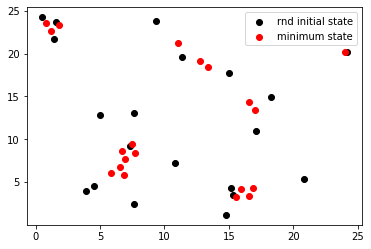


 20
This is a comment
25.0
11.024958999906696 21.251366952430246 0.048240446331850956 -0.9626194288316843
16.56373139765752 14.302485098097732 0.8842825831729739 -1.1257521498468062
5.8666373769201305 6.044815043038273 0.27060126607454027 -1.8645786237555595
1.1975477706964712 22.612073616451404 -1.2664483778286457 0.2919527359933396
12.73087878507115 19.192460262218656 0.8002042510651953 0.2664597813141866
0.8347632892130632 23.543786142293225 -0.053910611318455655 -0.20601219546507274
16.903811659266985 4.349855825777851 -1.4167843192976426 -0.6247527082704926
6.568909564287793 6.7569691303259765 -0.3989010998900026 1.1522137263431318
7.452943211686396 9.410477253378307 0.4053559606382463 -1.6679486552385179
6.95608903309997 7.67626291433145 0.3858216404645799 -0.28999078029210046
16.543987242494595 3.4151228313791093 -0.6151843292361738 0.706767788965084
7.70054683320769 8.403272384009805 1.0927371935657357 1.0263716192404146
13.356355587498783 18.412176190786393 -0.777479852152853

In [6]:
### write results into file ###
f = open("results.txt", "w") #overwrites or creates a new file

filestring = f"""{M}
This is a comment
{L}\n"""

### plot initial random state (only 2D) ###
if dims == 2:
    for n, c in enumerate(coords):
        if n == 0:
            plt.scatter(c[0], c[1], color="k", label="rnd initial state")
        else:
            plt.scatter(c[0], c[1], color="k")
else:
    pass

for k in range(0, len(result.x), dims):
    if dims == 3:
        x, y, z = result.x[k], result.x[k+1], result.x[k+2]
        vx, vy, vz = vels[k//dims]  ### check if that works!
        filestring += f"{x} {y} {z} {vx} {vy} {vz}\n"
    elif dims == 2:
        x, y = result.x[k], result.x[k+1]
        vx, vy = vels[k//dims]
        filestring += f"{x} {y} {vx} {vy}\n"
    
    if k == 0 and dims == 2:
        plt.scatter(x, y, color="r", label="minimum state") #label in plot
    elif k != 0 and dims == 2:
        plt.scatter(x, y, color="r")
    else:
        pass #only for dims neq 2

    
f.write(filestring)
f.close()

if dims == 2:
    plt.legend()
    plt.show()
else:
    pass

print("\n", filestring)